# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
dataset = get_dataset("data/waymo/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [3]:
label_colors = {1: 'green', 2: 'red', 4: 'blue'}
label_map =  {1: 'Car', 2: 'Pedestrian', 4: 'Cyclist'}

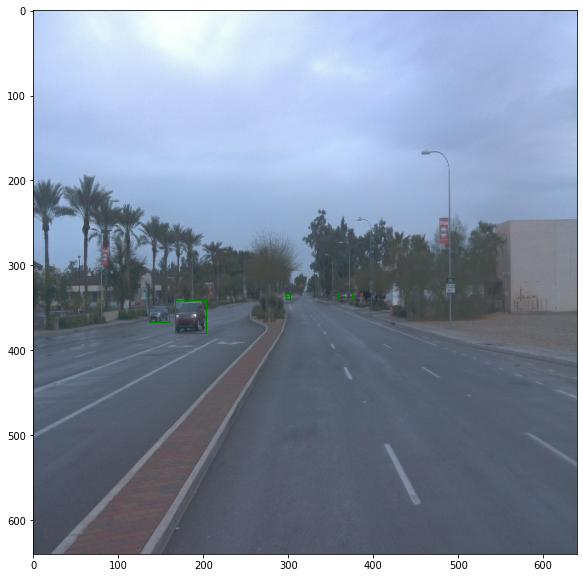

In [4]:
# analyze one frame
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle 
%matplotlib inline

f, ax = plt.subplots(figsize=(10, 10))
for data in dataset.take(1):
    w,h,_ = data['image'].shape
    image = data['image'].numpy()
    bb_boxes = data['groundtruth_boxes'].numpy( )
    labels = data['groundtruth_classes'].numpy()    
    ax.imshow(image)        
    for bb_box,label in zip(bb_boxes, labels):
        # Normalize bb_box
        bb_box[0] = bb_box[0]*h
        bb_box[1] = bb_box[1]*w
        bb_box[2] = bb_box[2]*h
        bb_box[3] = bb_box[3]*w
        
        (y1, x1, y2, x2) = bb_box
        rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=label_colors[label])
        ax.add_patch(rec)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle 
%matplotlib inline

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    row = 5
    col = 2
    f, ax = plt.subplots(row, col, figsize=(40, 40))
    
    i = 0
    for data in batch:
        x = i % row
        y = i % col
        w,h,_ = data['image'].shape
        image = data['image'].numpy()
        bb_boxes = data['groundtruth_boxes'].numpy( )
        labels = data['groundtruth_classes'].numpy()    
        ax[x,y].imshow(image) # render image for x,y subplot        
        for bb_box,label in zip(bb_boxes, labels):
            # Normalize bb_box
            bb_box[0] = bb_box[0]*h
            bb_box[1] = bb_box[1]*w
            bb_box[2] = bb_box[2]*h
            bb_box[3] = bb_box[3]*w

            (y1, x1, y2, x2) = bb_box
            rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none', edgecolor=label_colors[label])
            ax[x,y].add_patch(rec) # Add rectangle patch to x,y subplot
                    
        i = i + 1 # increment i
            

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

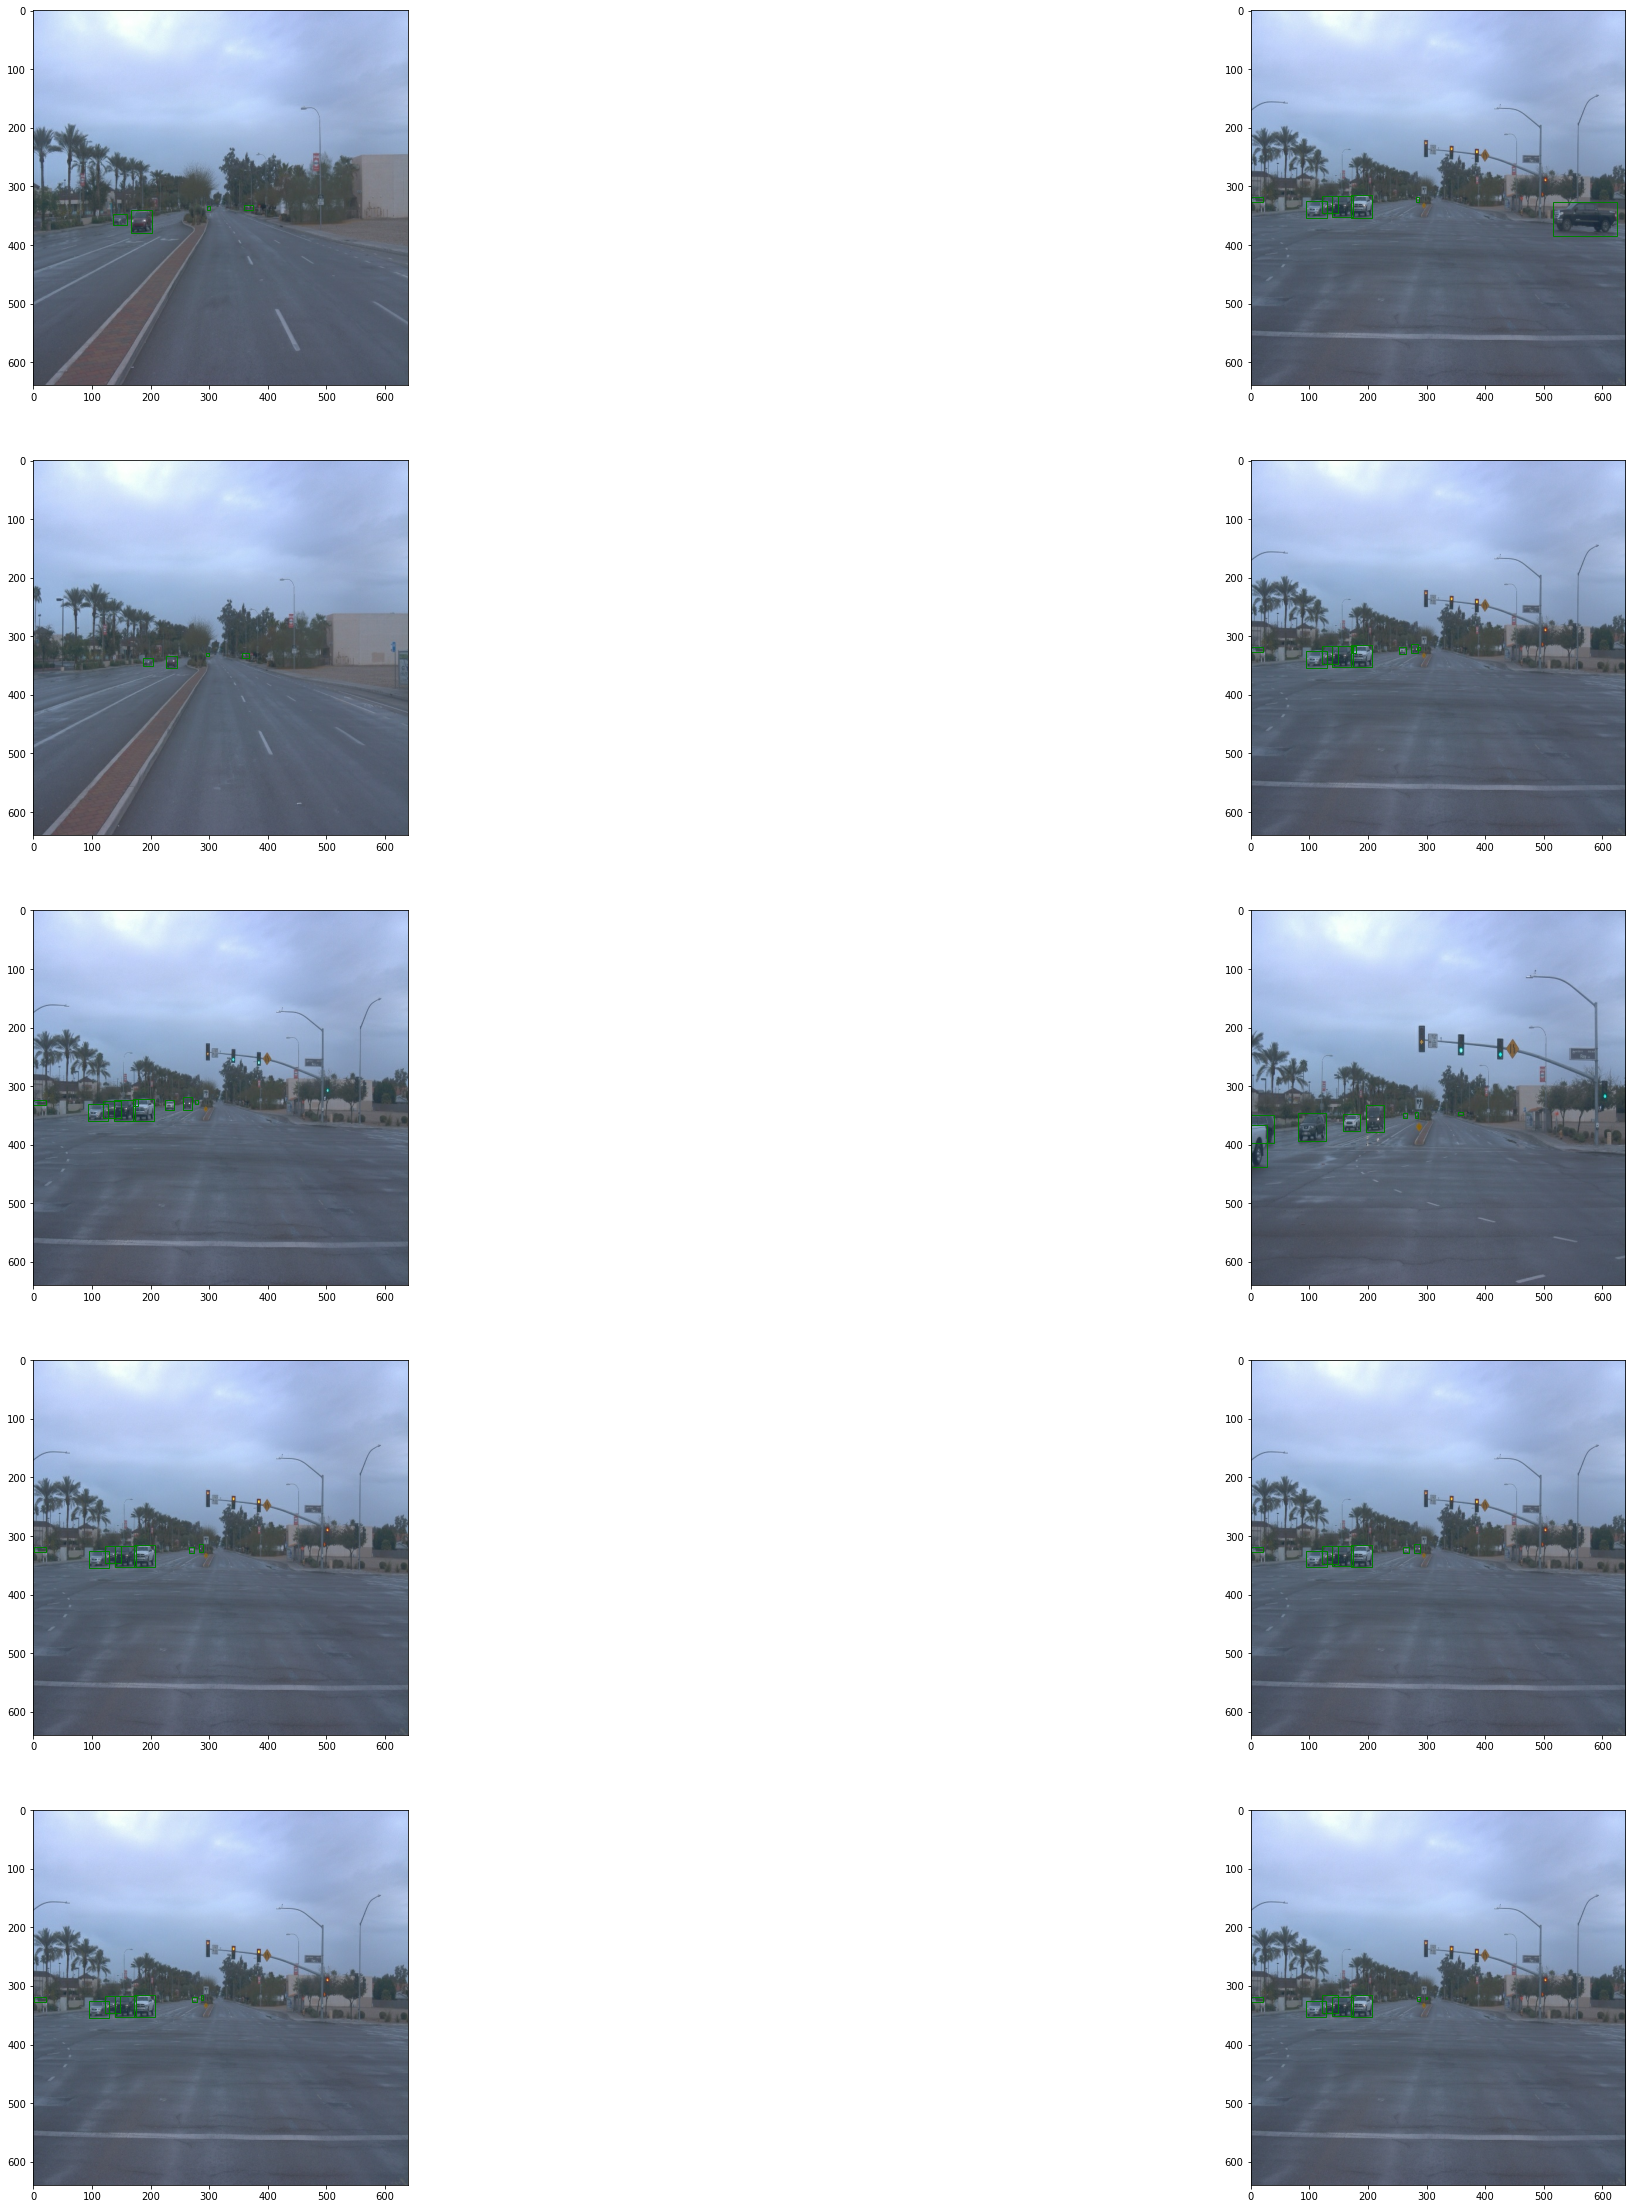

In [6]:
## STUDENT SOLUTION HERE
display_instances(dataset.shuffle(100).take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### Frequency of class using bar chart

Analyze `{1: 'vehicle', 2: 'pedestrian', 4: 'cyclist'}` distribution as barchart.

In [7]:
import os
train_dir = 'data/waymo/train'
tf_records = os.listdir(train_dir)
datasets = []
for tf_record in tf_records:    
    tf_record_path = os.path.join(train_dir, tf_record)
    dataset = get_dataset(tf_record_path)
    datasets.append(dataset)

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenam

INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11139647661584646830_5470_000_5490_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11139647661584646830_5470_000_5490_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11971497357570544465_1200_000_1220_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11971497357570544465_1200_000_1220_000_with_camer

INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-11183906854663518829_2294_000_2314_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-1022527355599519580_4866_960_4886_960_with_camera

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/train/segment-10664823084372323928_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/train/segment-10664823084372323928_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filen

In [8]:
label_distributions = {1: 0, 2: 0, 4: 0} # initialize count as 0
label_count_distributions = {1: [], 2: [], 4: []}
for dataset in datasets:
    for data in dataset.take(1000):
        groundtruth_classes = data['groundtruth_classes'].numpy()
        # iterate each image
        image_class_count = {1: 0, 2: 0, 4: 0}
        for label in groundtruth_classes:
            label_distributions[label] += 1 # Count overall frequency of each class
            image_class_count[label] += 1 # Count number of class in each image
        # Record each class findings
        for label, count in image_class_count.items():
            label_count_distributions[label].append(count) # Record class count findings
            
print(label_distributions)
# print(label_count_distributions)
    

{1: 1348279, 2: 357935, 4: 9805}


In [9]:
!pip install seaborn -q

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/root/miniconda3/bin/python -m pip install --upgrade pip' command.


[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Number of objects'),
 Text(0.5, 1.0, 'Frequency of class')]

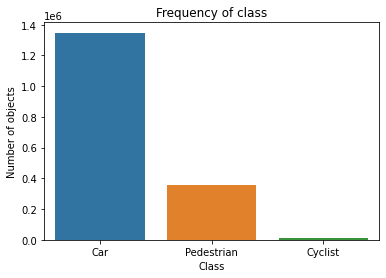

In [10]:
# Draw histogram for labels frequency
import seaborn as sns
x = []
y = []
for key, value in label_map.items():
    x.append(value)
    y.append(label_distributions[key])
ax = sns.barplot(x=x, y=y)
ax.set(xlabel='Class', ylabel='Number of objects', title='Frequency of class')

### Histogram of Cars
We would like to explore number of cars in frame and what is frequency. For example, in how many frames we have 3 cars or how many frames we have 1 car.


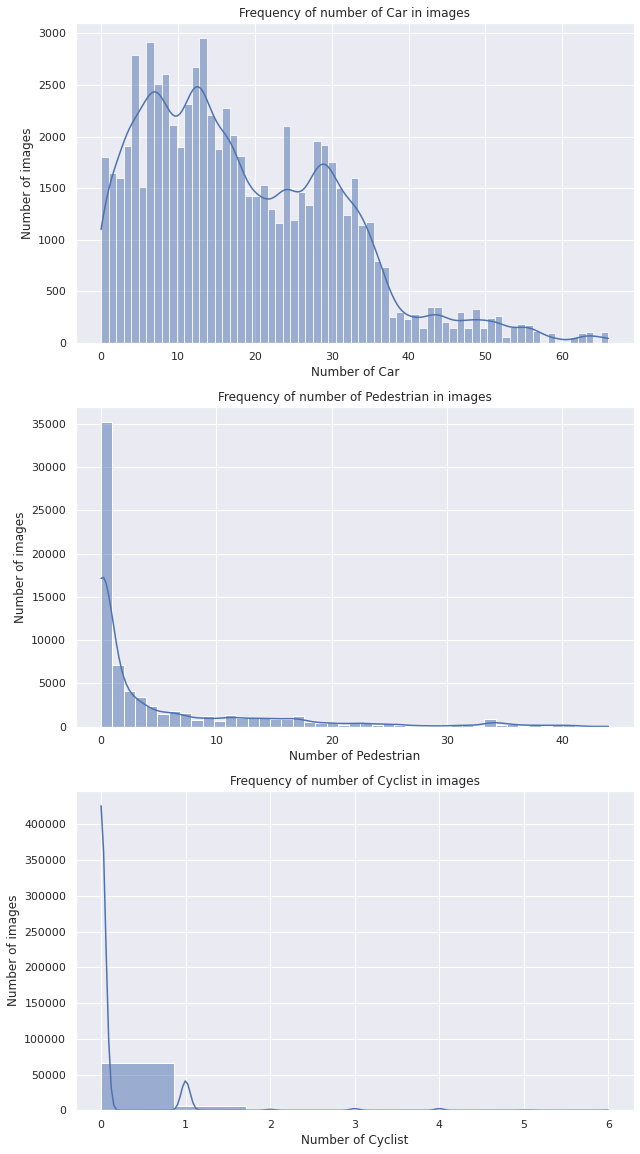

In [12]:
# histogram for each class
from matplotlib import pyplot as plt
fix,axs = plt.subplots(3)
sns.set(rc={'figure.figsize':(20,20)})
i = 0
for label, name in label_map.items():
    data = label_count_distributions[label]
    bins = max(data) - min(data) + 1
    ax = sns.histplot(ax=axs[i], data=data,bins=bins,  kde=True)
    xlabel = f'Number of {name}'
    ylabel = 'Number of images'
    title = f'Frequency of number of {name} in images'
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    i += 1
